# Lab 10: Sentiment Analysis with NLTK

<sup>This lab is based on https://github.com/lesley2958/twilio-sent-analysis</sup>


Welcome to lab 10! In this exercise, you will step through two simple examples using scikit-learn and *NLTK*, one of the most popular Natural Language Processing and Analysis libraries for the Python programming language. NLTK features various lexical analyses, n-gram and collocation identification, part-of-speech tagging and named-entity recognition amongst others.

<img src="nltk_banner.jpeg" />

If you have launched this notebook in `binder` the `nltk` library should already have been installed on the underlying virtual machine that the copy of Jupyter Notebook is running in. If you have downloaded this notebook to use on your own computer (or in the CTR), you might need to install scikit-learn first before running this notebook. To install scikit-learn, open up the command-line (Command prompt on Windows, or Git Bash in the CTR) and type:

```
conda install nltk
```

and press Enter. Some text should whiz by indicating that it's installing various things. Once that is done, please restart Jupyter Notebook.

For full documentation about how to use NLTK you can reference here: https://www.nltk.org

In this lab session, we will try out some *sentiment analysis* on Twitter data. So you might be asking, what exactly is "sentiment analysis"? 

Well, it's exactly what it sounds like: it's building a computational system to determine the emotional tone behind words. This is important because it allows you to gain an understanding of the attitudes, opinions, and emotions of the people in your data. At a higher level, sentiment analysis involves Natural language processing and artificial intelligence by taking the actual text element, transforming it into a format that a machine can read, and using statistics to determine the actual sentiment.

In this tutorial, we'll review some of the methods used to determine sentiment. To use NLTK in Python code, you import from `nltk`.

Sentiment Analysis isn't a new problem. There are thousands of labeled data out there, labels varying from simple positive and negative to more complex systems that determine *how* positive or negative is a given text. With that said, I've selected a pre-labeled set of data consisting of tweets from Twitter. Using this data, we'll begin by building a sentiment analysis model with scikit-learn. 

## Part A: Building a sentiment analysis model

In this tutorial, we'll specifically use the Logistic Regression model from scikit-learn, which is a linear model commonly used for classifying binary data. The first part quite straightforward - I just want you to step through the code (there's nothing to solve in the first part) to get a feel for what is going on. In the second part, I want you to apply the sentiment analysis methods here to your own data.

### Preparing the Data

To implement our linear classifier, we need the twitter data in a format that allows us to feed it into the classifier. Using the `sklearn.feature_extraction.text.CountVectorizer`, we will convert the text documents to a matrix of token counts. As you'll see soon enough, these vector counts will be what the classifier will ultimately use to train. So first, we import all the needed modules: 

In [1]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer        

But before we even get to vectorizing, we haven't even read in our data! Each file is a text file where each line is a sentence, so we can use the built-in `open()` function to split the file into tweets and append them to lists. Note that text and labels have to be separated for the test phase of this example!

In [2]:
text_pos = []
labels_pos = []
with open("pos_tweets.txt") as f:
    for i in f: 
        text_pos.append(i) 
        labels_pos.append('pos')

text_neg = []
labels_neg = []
with open("neg_tweets.txt") as f:
    for i in f: 
        text_neg.append(i)
        labels_neg.append('neg')

Now that the data is properly stored in Python lists, it's time to split this data into training and test data. For the purpose of this tutorial, we'll keep 80% for training and 20% for testing -- we do this with Python list slicing! 

In [3]:
training_text = text_pos[:int((.8)*len(text_pos))] + text_neg[:int((.8)*len(text_neg))]
training_labels = labels_pos[:int((.8)*len(labels_pos))] + labels_neg[:int((.8)*len(labels_neg))]

test_text = text_pos[int((.8)*len(text_pos)):] + text_neg[int((.8)*len(text_neg)):]
test_labels = labels_pos[int((.8)*len(labels_pos)):] + labels_neg[int((.8)*len(labels_neg)):]

Next, we initialize a vectoriser with the CountVectorizer class. Because we haven't pre-processed any of the data, we'll set lowercase to `False` and exclude stop word removal or stemming. 

In [4]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    max_features = 85
)

Next, we use the `fit_transform()` method to transform our corpus data into feature vectors. Since the input needed is a list of strings, we concatenate all of our training and test data. 

In [5]:
features = vectorizer.fit_transform(
    training_text + test_text)

features_nd = features.toarray() # for easy use

As a final step, we'll split the training data to get an evaluation set through scikit-learn's built-in cross validation method. All we need to do is provide the data and assign a training percentage (in this case, 80%).

In [6]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features_nd[0:len(training_text)], 
        training_labels,
        train_size=0.80, 
        random_state=1234)

D:\Python\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Linear Classifier

Finally, we can build the classifier for this corpus! As mentioned before, we'll be using the Logistic Regression from scikit-learn, so we'll start there: 

In [7]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

Once the model is initialized, we have to fit it to our specific dataset, so we use scikit-learn's `fit()` method to do so:

In [8]:
log_model = log_model.fit(X=X_train, y=y_train)

And finally, we use this classifier to label the evaluation set we created earlier:

In [9]:
test_pred = log_model.predict(X_test)

### Accuracy

Now just for our own "fun", let's take a look at some of the classifications our model makes! We'll choose a random set and then call our model on each! 

In [10]:
import random
spl = random.sample(range(len(test_pred)), 10)
for text, sentiment in zip(test_text, test_pred[spl]):
    print(sentiment, text)

neg "Love that the Obamas are bringing back date night. Men, take note  http://bit.ly/ebPBZ"

neg "loves chocolate milk  and that is GF YEAH.."

neg "loving life... and loving you "

neg "Lunch date with @Londonmitch to go to Leathenhall Market's cheese shop was really nice "

pos "Made my evening: Starbucks barista complimented me on my hamsa scarf. When he heard I designed it and sell them on etsy he was "

neg "Matt came to visit!  canton with him for dinner then prolly stopping somewhere for drinks and the cavs "

neg "May be going to London next week "

pos "me and rosa are going 2 start our own youtube channel! i'm super excited that we get 2 share our RaNdOmNeSs with the world!!!! "

pos "Modern warfare 2 gameplay looks goood  #xboxe3"

neg "Momz just made it back from Vegas, yayyyyy! "



Just glancing over the examples above, it's pretty obvious there are some misclassifications. But obviously we want to do more than just 'eyeball' the data, so let's actually calculate the accuracy score. 

What's the point in creating a machine learning algorithm if you have no idea how it performs? This is why we left some of the dataset for testing purposes. In scikit-learn, there is a function called sklearn.metrics.accuracy_score which calculates the accuracy percentage. Using this, we see that this model has an accuracy of about 76%. 

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, test_pred))

0.7601246105919003


Yikes. 76% is better than randomly guessing, but still pretty low as far as classification accuracy goes. *Maybe* this is the best we can do with this dataset, but maybe we *can* do better? So let's give it a try with the Python module `nltk`. 

### Preparing the Data 

`nltk` is a much different from `scikit-learn`. `nltk` specializes and is *made for* natural language processing tasks, so needless to say, it was expected that `scikit-learn` wouldn't necessarily be the best choice. 
 
With that said, we'll now use `nltk` to build a sentiment analysis model on the same dataset. `nltk` requires a different data format, which is why I've implemented the function below:

In [10]:
import nltk

def format_sentence(sent):
    return({word: True for word in nltk.word_tokenize(sent)})

print(format_sentence("My cat is very cute"))

{'My': True, 'cat': True, 'is': True, 'very': True, 'cute': True}


Here, `format_sentence` changes each tweet into a dictionary of words mapped to `True` booleans. Though not obvious from this function alone, this will eventually allow us to train our prediction model by splitting the text into its tokens, i.e. <i>tokenizing</i> the text. You'll learn about why this format is important in a later section.

Using the data on the github repo, we'll actually format the positively and negatively labeled data.

In [11]:
pos = []
with open("pos_tweets.txt") as f:
    for i in f: 
        pos.append([format_sentence(i), 'pos'])

In [12]:
neg = []
with open("neg_tweets.txt") as f:
    for i in f: 
        neg.append([format_sentence(i), 'neg'])

Next, we'll split the labeled data into the training and test data, just as we did before.

In [13]:
training = pos[:int((.8)*len(pos))] + neg[:int((.8)*len(neg))]
test = pos[int((.8)*len(pos)):] + neg[int((.8)*len(neg)):]

### Building a Classifier

All NLTK classifiers work with feature structures, which can be simple dictionaries mapping a feature name to a feature value. In this example, we use the Naive Bayes Classifier, which makes predictions based on the word frequencies associated with each label of positive or negative.

In [14]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(training)

Since the Naive Bayes Classifier is based entirely off of the frequencies associated with each label for a given word, we can call a function `show_most_informative_features()` to see which words are the highest indicators of a positive or negative label:

In [15]:
classifier.show_most_informative_features()

Most Informative Features
                      no = True              neg : pos    =     19.4 : 1.0
                    love = True              pos : neg    =     19.0 : 1.0
                 awesome = True              pos : neg    =     17.2 : 1.0
                headache = True              neg : pos    =     16.2 : 1.0
                      Hi = True              pos : neg    =     12.7 : 1.0
                   Thank = True              pos : neg    =      9.7 : 1.0
                     New = True              pos : neg    =      9.7 : 1.0
               beautiful = True              pos : neg    =      9.7 : 1.0
                     fan = True              pos : neg    =      9.7 : 1.0
                    haha = True              pos : neg    =      9.3 : 1.0


Notice that there are three columns. Column 1 is why we used `format_sentence()` to map each word to a `True` value. What it does is count the number of occurences of each word for both labels to compute the ratio between the two, which is what column 3 represents. Column 2 lets us know which label occurs more frequently (the label on the left is the label most associated with the corresponding word. 

### Classification

Just to see how our model works, let's try the classifier out with a positive example: 

In [16]:
example1 = "The University of Oxford is great!"
print(classifier.classify(format_sentence(example1)))

pos


Now let's try out an example we'd expect a negative label: 

In [17]:
example2 = "I'm sad that as an early career academic I don't get a better pension deal!"
print(classifier.classify(format_sentence(example2)))

neg


So what happens when we mix words of different sentiment labels? Let's take a look at this example:

In [18]:
example3 = "I have no worries!"
print(classifier.classify(format_sentence(example3)))

neg


And we've found a mislabel! Naive Bayes doesn't consider the relationship *between* words, which is why it wasn't able to catch the fact that "no" acted as a negator to the word `headache`. Instead, it read two negative indicators and classified it as such. 

Given that, we can probably expect a less than perfect accuracy rate.

### Accuracy

Just like `scikit-learn`, nltk has a built in method that computes the accuracy rate of our model:

In [19]:
from nltk.classify.util import accuracy
print(accuracy(classifier, test))

0.8308457711442786


And we have improved performance! Awesome. Now, 83% is fairly solid, but it could be better! If you look at the actual data, you'll see that the data is kind of messy - there are typos, abbreviations, grammatical errors of all sorts.

So how do we handle that? Can we handle that? We did some of that with our Project Gutenberg examples in the earlier weeks - stripping out punctuation, and making the input data case-insensitive. We can also filter out word that are not of interest, such as "and", "the", "via" and so on. These are called *stopwords*. `nltk` allows us to get a corpus of commonly found stopwords, which we can then use to filter out of our data.

In [20]:
import numpy as np
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
punctuation = list(string.punctuation)
english_stopwords = stopwords.words('english')
print("Punctuation: ", punctuation)
print("Stopwords: ", english_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Punctuation:  ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
Stopwords:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', '

Try and apply these stoplists to what we did earlier to see if it makes any difference to the performance of our models. 

What other filters can we apply if we are dealing with the [anatomy of tweets](https://marketing.wtwhmedia.com/twitter-for-business-101-the-anatomy-of-a-tweet/) from Twitter?

## Part B: Applying using NLTK with your own data

Now you have an idea of how to use NLTK, try and apply some natural language processing to the tweets you gathered in Lab 8 (the `tweepy` exercise). Some ideas of what you could try to do:

1. List the most recent tweets of Donald Trump's (or another Twitter user of interest) and predict if they are positive or negative.
2. Build a DataFrame of tweets, and add a column indicating the postive or negative predictions.
3. Plot the predicted sentiments in a time series against other factors to see if there might be some relationship, for example between positive tweets and the number of retweets or likes vs. negative tweets.

Add your own cells below with your own working.

### 1.List the most recent tweets of Donald Trump's (or another Twitter user of interest) and predict if they are positive or negative.

In [26]:
import pandas as pd
tweets_df=pd.read_csv('tweets.csv')
for tweet in tweets_df.head(20)['Tweets'].tolist():
    print(classifier.classify(format_sentence(tweet))+' '+tweet)

neg RT @FLOTUS: Greetings from @WhiteHouse https://t.co/mjuHFqglYz
pos Remember when they were saying, during the campaign, that Donald Trump is giving great speeches and drawing big cro… https://t.co/tmNjLRpLXI
neg Crazy Joe Biden is trying to act like a tough guy. Actually, he is weak, both mentally and physically, and yet he t… https://t.co/4e33ZxnAw7
neg Democrats refused to take care of DACA. Would have been so easy, but they just didn’t care. I had to fight for Military and start of Wall.
neg Got $1.6 Billion to start Wall on Southern Border, rest will be forthcoming. Most importantly, got $700 Billion to… https://t.co/0uCYCqGbgf
neg .....They can help solve problems with North Korea, Syria, Ukraine, ISIS, Iran and even the coming Arms Race. Bush… https://t.co/hrZ6vrJjVC
pos I called President Putin of Russia to congratulate him on his election victory (in past, Obama called him also). Th… https://t.co/GZNDtLqkop
neg “Special Council is told to find crimes, whether a crime exists

## Build a DataFrame of tweets, and add a column indicating the postive or negative predictions.

In [29]:
for row in tweets_df.index:
    tweet=tweets_df.loc[row,'Tweets']
    tweets_df.loc[row,'Sentiment']=classifier.classify(format_sentence(tweet))
tweets_df.head(10)                                                    

,Unnamed: 0,Tweets,len,ID,Date,Source,Likes,RTs,Sentiment
0,0,RT @FLOTUS: Greetings from @WhiteHouse https:/...,62,976869330020458500,2018-03-22 17:12:52,Twitter for iPhone,0,4905,neg
1,1,"Remember when they were saying, during the cam...",140,976770619424563200,2018-03-22 10:40:37,Twitter for iPhone,59561,13645,pos
2,2,Crazy Joe Biden is trying to act like a tough ...,140,976765417908776963,2018-03-22 10:19:57,Twitter for iPhone,151839,48267,neg
3,3,Democrats refused to take care of DACA. Would ...,138,976655903729610752,2018-03-22 03:04:47,Twitter for iPhone,61113,14334,neg
4,4,Got $1.6 Billion to start Wall on Southern Bor...,139,976654851684945920,2018-03-22 03:00:36,Twitter for iPhone,77161,18452,neg
5,5,.....They can help solve problems with North K...,139,976535330835836929,2018-03-21 19:05:40,Twitter for iPhone,74274,18235,neg
6,6,I called President Putin of Russia to congratu...,140,976532956557737984,2018-03-21 18:56:14,Twitter for iPhone,115735,27347,pos
7,7,"“Special Council is told to find crimes, wheth...",140,976420417090015232,2018-03-21 11:29:03,Twitter for iPhone,70904,17487,neg
8,8,...there was no probable cause for believing t...,140,976415945714556928,2018-03-21 11:11:17,Twitter for iPhone,75828,18777,neg
9,9,Department of Justice should have urged the Su...,140,976411208717950976,2018-03-21 10:52:27,Twitter for iPhone,54115,13893,pos


## Plot the predicted sentiments in a time series against other factors to see if there might be some relationship, for example between positive tweets and the number of retweets or likes vs. negative tweets.

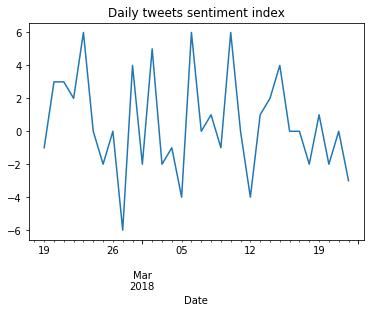

In [53]:
tweets_df['Date']=pd.to_datetime(tweets_df['Date'])
plot_tweet=pd.Series(index=tweets_df['Date'],data=-1)
pos_tweets=tweets_df[tweets_df['Sentiment']=='pos'].index
plot_tweet[pos_tweets]=1
%matplotlib inline
plot_tweet.resample('D').sum().plot(title='Daily tweets sentiment index')

When you're finished with lab 10 (or had completed what you can), choose **Save and Checkpoint** from the **File** menu, then choose **Download as Notebook** and save it to your computer or USB stick. You can then send a copy to the lecturer via Slack or email to check over.